## Packet Flow Detection

Steps of building a Network packet detection model

- Data Processing

- Building the RNN Bidirectional LSTM

- Generating the Prediction visualization

In [53]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [54]:
df_flow= pd.read_csv("FinalDataFrame_HotEncodings_Flow.csv")

In [40]:
pd.set_option('display.max_columns', None)
df_flow.head()

,Unnamed: 0,id,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,tcprtt,smean,dmean,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_dst_src_ltm,ct_src_ltm,label
0,0,1,0.121478,6,4,74.087490,252,254,14158.942380,8495.365234,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,0.000000,43,43,1,0,1,1,1,0
1,1,2,0.649902,14,38,78.473372,62,252,8395.112305,503571.312500,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,0.000000,52,1106,43,1,1,2,1,0
2,2,3,1.623129,8,16,14.170161,62,252,1572.271851,60929.230470,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,0.111897,46,824,7,1,2,3,2,0
3,3,4,1.681642,12,12,13.677108,62,252,2740.178955,3358.622070,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,0.000000,52,64,1,1,2,3,2,0
4,4,5,0.449454,10,6,33.373826,254,252,8561.499023,3987.059814,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,0.128381,53,45,43,1,2,40,2,0


In [41]:
df_flow.columns

Index(['Unnamed: 0', 'id', 'dur', 'spkts', 'dpkts', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb',
       'dtcpb', 'tcprtt', 'smean', 'dmean', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'label'],
      dtype='object')

In [42]:
df_flow = df_flow.drop('Unnamed: 0', 1)

In [43]:
# Do we need to drop id ????

In [44]:
df_flow.columns

Index(['id', 'dur', 'spkts', 'dpkts', 'rate', 'sttl', 'dttl', 'sload', 'dload',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'tcprtt',
       'smean', 'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_dst_src_ltm', 'ct_src_ltm', 'label'],
      dtype='object')

In [45]:
# split the data into train and test set 
data_training, data_testing = train_test_split(df_flow, test_size=0.3, random_state=42, shuffle=True)


In [46]:
pd.set_option('display.max_columns', None)
data_training.head()
data_training.shape

(122738, 25)

In [47]:
pd.set_option('display.max_columns', None)
data_testing.head()
data_training.shape

(122738, 25)

In [48]:
# Compare the effect of different scalers on data with outliers
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[9.11217192e-01, 1.33333358e-07, 1.04004160e-04, ...,
        5.00000000e-01, 6.20000000e-01, 1.00000000e+00],
       [1.95200128e-01, 2.44660045e-03, 6.76027041e-03, ...,
        4.68750000e-02, 2.00000000e-02, 0.00000000e+00],
       [9.44512884e-01, 1.33333358e-07, 1.04004160e-04, ...,
        2.65625000e-01, 2.00000000e-01, 1.00000000e+00],
       ...,
       [7.52438148e-01, 1.33333358e-07, 1.04004160e-04, ...,
        5.00000000e-01, 3.00000000e-01, 1.00000000e+00],
       [8.37616489e-01, 6.66666789e-08, 1.04004160e-04, ...,
        5.46875000e-01, 7.20000000e-01, 1.00000000e+00],
       [6.95553731e-01, 1.50000028e-07, 1.04004160e-04, ...,
        3.59375000e-01, 3.00000000e-01, 1.00000000e+00]])

In [49]:
#
X_train = []
y_train = []

In [50]:
data_training.shape[0]

122738

In [52]:
data_training = data_training.iloc[:, 2:3].values

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
x_train,x_val=train[train_indices],train[val_indices]
y_train,y_val=y[train_indices],y[val_indices]

In [14]:
# what is 60?
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i,0])

In [15]:
X_train, y_train = np.array(X_train),np.array(y_train)

In [16]:
X_train.shape, y_train.shape

((122678, 60, 25), (122678,))

#### Building Bidirectional  LSTM

In [17]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

Using TensorFlow backend.


In [18]:
# Bidirectional(LSTM)
# activation = 'relu'
# https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/
# https://stats.stackexchange.com/questions/226923/why-do-we-use-relu-in-neural-networks-and-how-do-we-use-it
# units =
regressior = Sequential()
regressior.add(Bidirectional(LSTM(units =60,activation = 'relu', return_sequences = True), input_shape = (X_train.shape[1],25)))
regressior.add(Dropout(0.07))

regressior.add(Bidirectional(LSTM(units =60,activation = 'relu', return_sequences = True)))
regressior.add(Dropout(0.07))

regressior.add(Bidirectional(LSTM(units =80,activation = 'relu', return_sequences = True)))
regressior.add(Dropout(0.07))

regressior.add(Bidirectional(LSTM(units =90,activation = 'relu')))
regressior.add(Dropout(0.7))

regressior.add(Dense(units = 1))


In [19]:
X_train.shape

(122678, 60, 25)

In [20]:
y_train.shape

(122678,)

In [21]:
# https://www.datatechnotes.com/2019/12/multi-output-regression-example-with_24.html
regressior.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 60, 120)           41280     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 120)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 60, 120)           86880     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 120)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 60, 160)           128640    
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 160)           0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 180)              

In [22]:
# https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
# Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
# https://keras.io/api/optimizers/adam/
regressior.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [23]:
import keras
keras.__version__
# Version 2.4.3 is causing problem in epoch , data set doesnt go over all the data 

'2.3.1'

In [24]:
# to fix that do the following from conda comand prompt , Now you have to install tensorflow v 2.1.0:
#pip uninstall tensorflow
#python3 -m pip uninstall protobuf    
#python3 -m pip uninstall tensorflow-gpu
#pip install tensorflow==2.1.0
# pip uninstall keras
#and then install keras v 2.3.1:
#pip install keras==2.3.1


In [32]:
# However, increasing the epochs isn't always necessarily a bad thing. Sure, it will add to your training time, 
# but it can also help make your model even more accurate, especially if your training data set is unbalanced. 
# However, with increasing epochs you do run the risk of your NN over-fitting the data

# I got best results with a batch size of 32 and epochs = 100 while training a Sequential model in Keras with 3 hidden layers.
# Generally batch size of 32 or 25 is good, with epochs = 100 unless you have large dataset. in case of large dataset 
# you can go with batch size of 10 with epochs b/w 50 to 100.

# Epoch is the number of passes over the data. Loss is the error over the training set typically in terms of mean 
# squared error (for regression) or log loss (for classification)
# https://stackoverflow.com/questions/34673396/what-does-the-standard-keras-model-output-mean-what-is-epoch-and-loss-in-keras

history = regressior.fit(X_train, y_train, epochs = 20, batch_size = 32).history

Epoch 1/20
122678/122678 [==============================] - 602s 5ms/step - loss: 0.0835
Epoch 2/20
122678/122678 [==============================] - 606s 5ms/step - loss: 0.0835
Epoch 3/20
122678/122678 [==============================] - 588s 5ms/step - loss: 0.0835
Epoch 4/20
122678/122678 [==============================] - 3121s 25ms/step - loss: 0.0835
Epoch 5/20
122678/122678 [==============================] - 590s 5ms/step - loss: 0.0835
Epoch 6/20
122678/122678 [==============================] - 586s 5ms/step - loss: 0.0835
Epoch 7/20
122678/122678 [==============================] - 583s 5ms/step - loss: 0.0835
Epoch 8/20
122678/122678 [==============================] - 572s 5ms/step - loss: 0.0835
Epoch 9/20
122678/122678 [==============================] - 580s 5ms/step - loss: 0.0835
Epoch 10/20
122678/122678 [==============================] - 851s 7ms/step - loss: 0.0835
Epoch 11/20
122678/122678 [==============================] - 594s 5ms/step - loss: 0.0835
Epoch 12/20
12267

In [35]:
#history

{'loss': [0.006320278700069807,
  0.006139384365819582,
  0.006202898023884983,
  0.006033948991389771,
  0.006035522625320423]}

In [33]:
%config IPCompleter.greedy=True
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf 
import matplotlib as matplot
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# does ID coloumn over fit my data , ?
# https://datascience.stackexchange.com/questions/33284/should-i-eliminate-all-id-columns-and-similar-columns-from-training-data
# https://stats.stackexchange.com/questions/224565/overfitting-due-to-a-unique-identifier-among-features

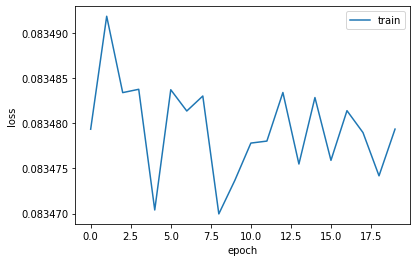

In [35]:

plt.plot(history['loss'])
#plt.plot(history['val_loss'])
#plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [31]:
#pip install keras_sequential_ascii

In [36]:
# To get model summary 
from keras_sequential_ascii import keras2ascii
keras2ascii(regressior)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     60   25
       Bidirectional   ????? -------------------     41280     9.4%
                       #####     60  120
             Dropout    | || -------------------         0     0.0%
                       #####     60  120
       Bidirectional   ????? -------------------     86880    19.8%
                       #####     60  120
             Dropout    | || -------------------         0     0.0%
                       #####     60  120
       Bidirectional   ????? -------------------    128640    29.4%
                       #####     60  160
             Dropout    | || -------------------         0     0.0%
                       #####     60  160
       Bidirectional   ????? -------------------    180720    41.3%
                       #####         180
             Dropout    | || -------------------         0     0.0%
                       #####         180
             

In [37]:
past_60_days = data_training.tail(60)

In [38]:
df = past_60_days.append(data_test,ignore_index = True)

df = df.drop(['id','attack_cat', 'proto','service','state'], axis =1)
#df.head

In [39]:
inputs = scaler.transform(df)
inputs

array([[5.03623234e-04, 7.17557252e-02, 3.91236307e-02, ...,
        8.19672131e-02, 0.00000000e+00, 0.00000000e+00],
       [1.05459484e-04, 4.58015267e-03, 3.12989045e-03, ...,
        2.29508197e-01, 0.00000000e+00, 0.00000000e+00],
       [2.02976413e-05, 1.52671756e-03, 1.56494523e-03, ...,
        3.27868852e-02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.72664246e-07, 1.52671756e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [40]:
data_training
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])

In [41]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape
#X_test_norm ,y_test_norm


((82332, 60, 40), (82332,))

In [42]:
X_test.shape, y_test.shape

((82332, 60, 40), (82332,))

In [43]:
y_pred = regressior.predict(X_test)

In [44]:
y_pred, y_test

(array([[0.00445086],
        [0.00461837],
        [0.00468779],
        ...,
        [0.03022243],
        [0.02412711],
        [0.0222997 ]], dtype=float32),
 array([2.11034078e-07, 1.53479329e-07, 9.59245809e-08, ...,
        0.00000000e+00, 0.00000000e+00, 1.72664246e-07]))

In [45]:
scaler.scale_

array([1.91849162e-02, 1.52671756e-03, 7.82472613e-04, 1.46728684e-05,
       6.09250865e-07, 9.99999997e-07, 3.92156863e-03, 3.93700787e-03,
       4.49640288e-10, 4.79509228e-08, 1.81818182e-02, 1.71526587e-03,
       1.66664489e-05, 1.91849232e-05, 2.70810267e-06, 3.45556508e-06,
       3.92156863e-03, 2.32843488e-10, 2.32835353e-10, 3.92156863e-03,
       2.48463255e+00, 3.90239334e+00, 4.25079702e+00, 7.48502994e-04,
       6.85871056e-04, 5.00000000e-01, 1.90734863e-06, 1.61290323e-02,
       3.33333333e-01, 2.22222222e-02, 2.22222222e-02, 2.22222222e-02,
       1.61290323e-02, 5.00000000e-01, 5.00000000e-01, 1.11111111e-01,
       2.22222222e-02, 1.63934426e-02, 1.00000000e+00, 1.00000000e+00])

In [46]:
scale =1/1.66666697e-02
scale

59.99998908000198

In [47]:
y_pred = y_pred*scale
y_test = y_test*scale

In [48]:
y_test

array([1.26620424e-05, 9.20875809e-06, 5.75547380e-06, ...,
       0.00000000e+00, 0.00000000e+00, 1.03598528e-05])

Visualization

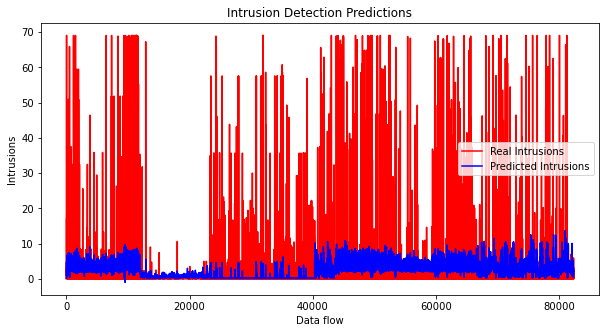

In [54]:
from matplotlib import pyplot
pyplot.figure(figsize =(10,5))
pyplot.plot(y_test,color = 'red', label= 'Real Intrusions')
pyplot.plot(y_pred,color = 'blue', label= 'Predicted Intrusions')
pyplot.title('Intrusion Detection Predictions')
pyplot.xlabel('Data flow')
pyplot.ylabel('Intrusions')
pyplot.legend()
pyplot.show()

In [55]:
import matplotlib as matplot
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

from keras.models import Model, load_model
from keras.layers import *
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,normalize



In [56]:

cm = confusion_matrix( y_test , y_pred )
print(cm)

ValueError: continuous is not supported